In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Walkthrough

Quick (ish) walkthrough of the new code, going file-by-file (kind of).

## `covid19dh`

Moved to using something called covid19datahub as the data source. Basically,
they offer a unified table formatting (column name, location, data types, etc...
all follow the same convention).

Their python package isn't the best so I'm in the process of re-implementing
the way the csv files are downloaded and cached.

The core functionality is:

In [2]:
from oscovida import covid19dh
?covid19dh.covid19

Object `covid19dh.covid19` not found.


There are three administrative levels, what they really mean depends on how a country has decided to define them, in principle it's something like:
 - level 1: country
 - level 2: state
 - level 3: city

In practice it varies a bit, anyway, you can do:

In [3]:
data = covid19dh.get('DEU')
data

,id,tests,confirmed,recovered,deaths,hosp,vent,icu,population,school_closing,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-05,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-06,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-07,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-08,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-16,DEU,9265361,224741,204728,9252,0,0,0,82905782,2,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-08-17,DEU,9265361,226252,204767,9253,0,0,0,82905782,2,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-08-18,DEU,9265361,227646,204780,9253,0,0,0,82905782,2,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE


Which is the **country** level data for Germany, we can look at the available administrative levels:

In [4]:
[print(f"level {l}:", data[f"administrative_area_level_{l}"].unique()) for l in [1,2,3]];

level 1: ['Germany']
level 2: [nan]
level 3: [nan]


And if we load level 2:

In [5]:
data = covid19dh.get('DEU', level=2)
[print(f"level {l}:", data[f"administrative_area_level_{l}"].unique()) for l in [1,2,3]];

level 1: ['Germany']
level 2: ['Bayern' 'Schleswig-Holstein' 'Mecklenburg-Vorpommern'
 'Nordrhein-Westfalen' 'Baden-Württemberg' 'Bremen' 'Thüringen'
 'Brandenburg' 'Hamburg' 'Saarland' 'Sachsen' 'Hessen' 'Rheinland-Pfalz'
 'Sachsen-Anhalt' 'Berlin' 'Niedersachsen']
level 3: [nan]


Or three:

In [6]:
data = covid19dh.get('DEU', level=3)
[print(f"level {l}:", data[f"administrative_area_level_{l}"].unique()) for l in [1,2,3]];

level 1: ['Germany']
level 2: ['Baden-Württemberg' 'Mecklenburg-Vorpommern' 'Hessen'
 'Nordrhein-Westfalen' 'Thüringen' 'Sachsen' 'Berlin' 'Bremen'
 'Niedersachsen' 'Rheinland-Pfalz' 'Brandenburg' 'Sachsen-Anhalt'
 'Schleswig-Holstein' 'Bayern' 'Saarland' 'Hamburg']
level 3: ['LK Freudenstadt' 'LK Waldshut' 'LK Nordwestmecklenburg'
 'LK Rheingau-Taunus-Kreis' 'LK Soest' 'LK Sigmaringen'
 'LK Siegen-Wittgenstein' 'LK Rheinisch-Bergischer Kreis' 'SK Suhl'
 'LK Görlitz' 'LK Waldeck-Frankenberg' 'LK Paderborn'
 'SK Berlin Steglitz-Zehlendorf' 'LK Heinsberg' 'LK Unna'
 'LK Main-Kinzig-Kreis' 'LK Wesel' 'LK Vogelsbergkreis' 'SK Bremerhaven'
 'LK Gießen' 'LK Mittelsachsen' 'LK Bergstraße' 'LK Warendorf'
 'LK Oberbergischer Kreis' 'SK Berlin Friedrichshain-Kreuzberg' 'LK Fulda'
 'LK Minden-Lübbecke' 'LK Heidekreis' 'SK Delmenhorst'
 'LK Westerwaldkreis' 'LK Wolfenbüttel' 'LK Oldenburg' 'SK Wilhelmshaven'
 'SK Frankfurt (Oder)' 'SK Berlin Reinickendorf' 'SK Braunschweig'
 'LK Tuttlingen' 'SK De

There's also citation functionality:

In [7]:
covid19dh.cite(covid19dh.get('DEU'))

['GADM (2019), https://public.opendatasoft.com/',
 'Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/',
 'Our World in Data (2020), https://github.com/',
 'Hale Thomas, Sam Webster, Anna Petherick, Toby Phillips, and Beatriz Kira (2020). Oxford COVID-19 Government Response Tracker, Blavatnik School of Government.',
 'Robert Koch-Institut (2020), https://npgeo-corona-npgeo-de.hub.arcgis.com/',
 'World Bank Open Data (2018), https://data.worldbank.org/',
 'Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.']

In [8]:
covid19dh.cite(covid19dh.get('USA'))

['CIA - Central Intelligence Agency (2020), https://www.cia.gov/',
 'Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/',
 'Our World in Data (2020), https://github.com/',
 'Hale Thomas, Sam Webster, Anna Petherick, Toby Phillips, and Beatriz Kira (2020). Oxford COVID-19 Government Response Tracker, Blavatnik School of Government.',
 'The COVID Tracking Project (2020), https://covidtracking.com/',
 'The New York Times (2020), https://github.com/',
 'World Bank Open Data (2018), https://data.worldbank.org/',
 'Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.']

Anyway, basically I wrap this as the data source, and use it to get the data for the oscovida `Region` class

## `regions`

The class used to load and contain the data is the `Region` class, it's a pretty simple wrapper around covid19dh functionality, with some additional attributes and argument parsing thrown in:

In [9]:
from oscovida.regions import Region

In [10]:
?Region

Init signature:
Region(
    admin_1: str,
    admin_2: Union[str, NoneType] = None,
    admin_3: Union[str, NoneType] = None,
    level: Union[int, NoneType] = None,
) -> None
Docstring:      <no docstring>
Init docstring:
Parameters
----------
admin_1: str
    Country name string (e.g. 'United States') or alpha_3 string,
    administrative area of top level (e.g. 'USA')
admin_2: Optional[str] = None
    Second-level administrative area, usually states, regions or cantons
    (e.g. 'California')
admin_3: Optional[str] = None
    Third-level administrative area, usually cities or municipalities
    (e.g. 'San Francisco')
level: Optional[int] = None
    Level is automatically detected from the number of administrative
    levels passed. Optionally you can specify the level to return a
    dataframe containing the information for all administrative regions

Attributes
-------
data: DataFrame
    Pandas dataframe containing the data for the specified region
cite: list[str]
    Returns a li

There's some vaguely-fancy parsing of the country-level region, so all of these work:

In [11]:
region = Region('DE')
region

Region(country='Germany', admin_1='DEU', admin_2=None, admin_3=None, level=1)

In [12]:
region = Region('DEU')
region

Region(country='Germany', admin_1='DEU', admin_2=None, admin_3=None, level=1)

In [13]:
region = Region('Germany')
region

Region(country='Germany', admin_1='DEU', admin_2=None, admin_3=None, level=1)

There's more fine-grained filtering:

In [14]:
region = Region('DE', 'Hamburg')
region

Region(country='Germany', admin_1='DEU', admin_2='Hamburg', admin_3=None, level=2)

Or less fine grained filtering:

In [15]:
region = Region('DE', 'Schleswig-Holstein', level=3)
region

Region(country='Germany', admin_1='DEU', admin_2='Schleswig-Holstein', admin_3='*', level=3)

So above you load German data, for Schleswig-Holstein, up to level 3. This means that the data is filtered to "Schleswig-Holstein" but goes a level further, giving you all the Landkreise in Schleswig-Holstein:

In [16]:
region.data.administrative_area_level_3.unique()

array(['SK Kiel', 'LK Plön', 'LK Herzogtum Lauenburg', 'SK Lübeck',
       'LK Pinneberg', 'LK Stormarn', 'LK Segeberg', 'LK Nordfriesland',
       'LK Rendsburg-Eckernförde', 'SK Flensburg', 'LK Dithmarschen',
       'LK Ostholstein', 'SK Neumünster', 'LK Schleswig-Flensburg',
       'LK Steinburg'], dtype=object)

This also wraps the citation function so:

In [17]:
region.cite

['GADM (2019), https://public.opendatasoft.com/',
 'Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/',
 'Our World in Data (2020), https://github.com/',
 'Hale Thomas, Sam Webster, Anna Petherick, Toby Phillips, and Beatriz Kira (2020). Oxford COVID-19 Government Response Tracker, Blavatnik School of Government.',
 'Robert Koch-Institut (2020), https://npgeo-corona-npgeo-de.hub.arcgis.com/',
 'World Bank Open Data (2018), https://data.worldbank.org/',
 'Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.']

## `statistics`

The statistics functionality is very modular now, every single function takes in a pandas series, and then returns a pandas series (apart from `min_max` which returns a tuple of floats)

In [18]:
import matplotlib.pyplot as plt
from oscovida import statistics

In [19]:
region = Region('DEU')
data = region.data

In [20]:
data

,id,tests,confirmed,recovered,deaths,hosp,vent,icu,population,school_closing,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-05,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-06,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-07,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-08,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-16,DEU,9265361,224741,204728,9252,0,0,0,82905782,2,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-08-17,DEU,9265361,226252,204767,9253,0,0,0,82905782,2,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-08-18,DEU,9265361,227646,204780,9253,0,0,0,82905782,2,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE


### `statistics.daily`

In [21]:
?statistics.daily

Signature: statistics.daily(obj: pandas.core.series.Series) -> pandas.core.series.Series
Docstring:
Computes the daily change for the series

Parameters
----------
obj : pd.Series
    Input column

Returns
-------
pd.Series
    Difference between rows

Examples
--------
TODO
File:      ~/work/project-covid/oscovida/oscovida/statistics.py
Type:      function


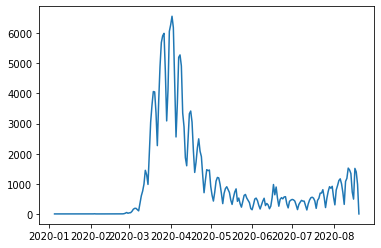

In [22]:
plt.plot(statistics.daily(data.confirmed))

### `statistics.smooth`

In [23]:
?statistics.smooth

Signature:
statistics.smooth(
    obj: pandas.core.series.Series,
    kind: str = 'weak',
    compound: bool = True,
) -> pandas.core.series.Series
Docstring:
Smooths the pandas series with a rolling average and mean

Parameters
----------
obj : Union[pd.Series, np.ndarray]
    Input column (pandas `Series` or numpy `ndarray`)
kind : str, optional
    Smoothing approach, either `'weak'`, `'strong'`, or `'7dayrolling`', by
    default 'weak'. The names correspond to:
    - 'weak': ({'window': 9, 'center': True, 'win_type': 'gaussian', 'min_periods': 1}, {'mean_std': 3})
    - 'strong': ({'window': 4, 'center': True, 'win_type': 'gaussian', 'min_periods': 1}, {'mean_std': 2})
    - '7dayrolling': ({'window': 7, 'center': True, 'win_type': 'gaussian', 'min_periods': 7,}, {'mean_std': 3,},
),
compound : bool
    If smoothing should be compounded, default to `True`. e.g. picking
    `strong` means that the data is first smoothed with `weak` smoothing,
    and `strong` smoothing is applied t

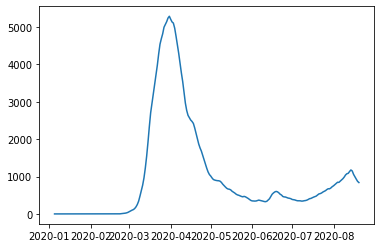

In [24]:
plt.plot(statistics.smooth(statistics.daily(data.confirmed)))

You can call the functions by nesting them, but it's very hard to read, so it's better (imo) to use pipe:

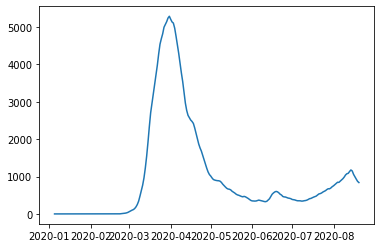

In [25]:
plt.plot(data.confirmed
    .pipe(statistics.daily)
    .pipe(statistics.smooth)
)

There are a few pre-defined smoothing methods:

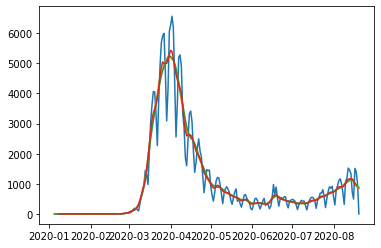

In [26]:
plt.plot(data.confirmed
    .pipe(statistics.daily)
)
plt.plot(data.confirmed
    .pipe(statistics.daily)
    .pipe(statistics.smooth, kind='weak')
)
plt.plot(data.confirmed
    .pipe(statistics.daily)
    .pipe(statistics.smooth, kind='strong')
)
plt.plot(data.confirmed
    .pipe(statistics.daily)
    .pipe(statistics.smooth, kind='7dayrolling')
)

Although in the end they're all quite similar

### `statistics.doubling_time`

In [27]:
?statistics.doubling_time

Signature:
statistics.doubling_time(
    obj: pandas.core.series.Series,
    minchange: float = 20,
) -> pandas.core.series.Series
Docstring:
Compute the doubling time for a given series by shifting the rows by one.

The doubling time equation is:

```
(t2 - t1) * (ln(2)/ln(q2/q1))
```

This function assumes that `t2 - t1 = 1`. The doubling time is computed
between subsequent rows. If you want to change the compared periods that
should be done before calling this function (e.g. compute the weekly mean
then put that into this function and you will get the weekly doubling time).

By default

Parameters
----------
obj : pd.Series
    Source series
minchange : float
    Values in the series under the minchange are set to 0 before computing
    the doubling time, by default 20

Returns
-------
pd.Series
    Doubling time

Examples
--------
TODO
File:      ~/work/project-covid/oscovida/oscovida/statistics.py
Type:      function


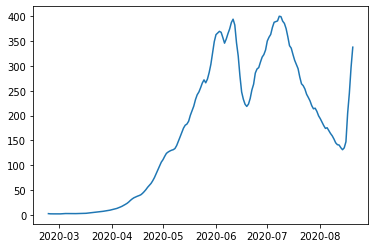

In [28]:
plt.plot(data.confirmed
    .pipe(statistics.smooth)
    .pipe(statistics.doubling_time)
)

### `statistics.r_number`

In [29]:
?statistics.r_number

Signature: statistics.r_number(obj: pandas.core.series.Series, tau=4) -> pandas.core.series.Series
Docstring:
Calculate the R-number using a method similar to RKI[1]. Assumes that the
input series has rows per-day.

[1] Robert Koch Institute: Epidemiologisches Bulletin 17 | 23 April 2020
https://www.rki.de/DE/Content/Infekt/EpidBull/Archiv/2020/Ausgaben/17_20.html

Parameters
----------
obj : pd.Series
    Source series
tau : int, optional
    Day averages, by default 4

Returns
-------
pd.Series
    R number per-day
File:      ~/work/project-covid/oscovida/oscovida/statistics.py
Type:      function


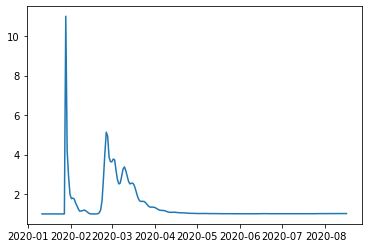

In [30]:
plt.plot(data.confirmed
    .pipe(statistics.r_number)
)

### `statistics.growth_factor`

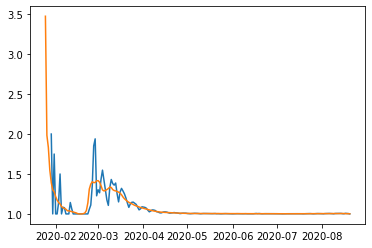

In [31]:
plt.plot(data.confirmed
    .pipe(statistics.growth_factor)
)

plt.plot(data.confirmed
    .pipe(statistics.smooth)
    .pipe(statistics.growth_factor)
)

### `statistics.doubling_time`

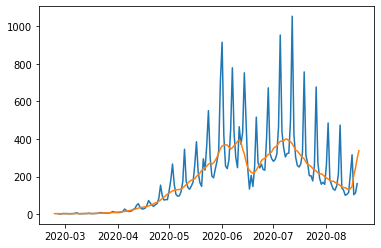

In [32]:
plt.plot(data.confirmed
    .pipe(statistics.doubling_time)
)

plt.plot(data.confirmed
    .pipe(statistics.smooth)
    .pipe(statistics.doubling_time)
)

## `plots`

It's very easy to just create your own plots, but there are included plotting functions as well:

In [33]:
from oscovida import plots

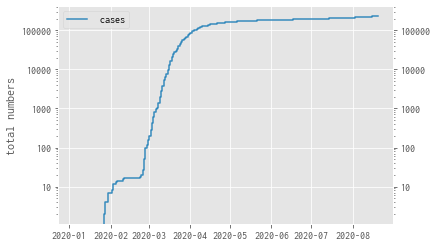

In [34]:
plots.plot_totals(data.confirmed)

These functions follow the standard pyplot convention of taking in either an `ax` argument or, if none is provided, defaulting to `gca()`. This means that calling subsequent plotting functions will plot onto the same axis:

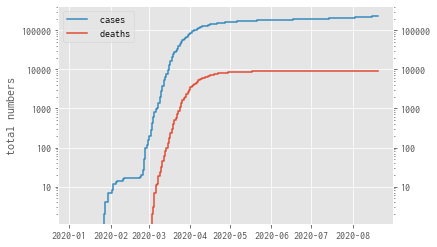

In [35]:
plots.plot_totals(data.confirmed)
plots.plot_totals(data.deaths)

The mildly odd thing I've done with the plotting is use `singledispatch`. So, if you call the plots as above with just the series, it will take it in and plot it. However only giving the plot a series means it has no other information (since pandas metadata is broken...), so you have to manually label the labels, which is a bit silly as that information is in the region data

Instead of having `plot_totals_region` which could take in a `Region` instead of a series, I used `singledispatch` so that you can do `plot_totals` on a region object, and it behaves differently:

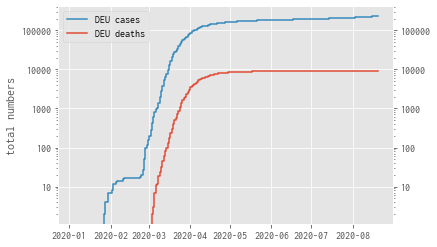

In [36]:
plots.plot_totals(region)

This is, I think, very cool! Although I agree it isn't pythonic. The 'correct' way to do this would be (I thinb) to have `plot_x` methods on the Region class, so that you could then do:

```python
region = Region('DEU')
region.plot_totals()
```

Which would behave identically to how my current singledispatch plot_totals function behaves

Either way, there many other plotting functions:

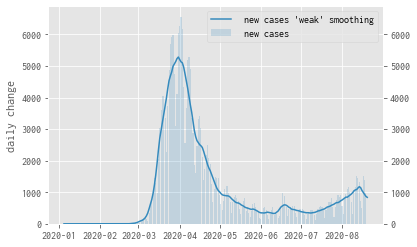

In [37]:
plots.plot_daily(data.confirmed)

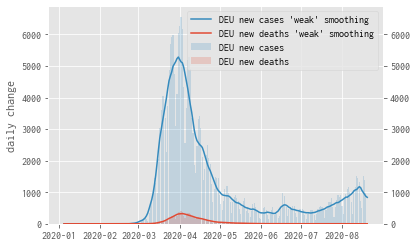

In [38]:
plots.plot_daily(region)

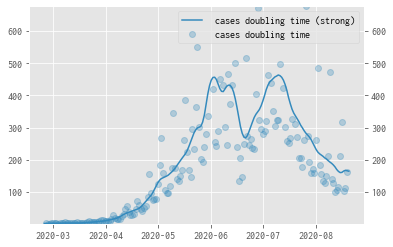

In [39]:
plots.plot_doubling_time(data.confirmed)

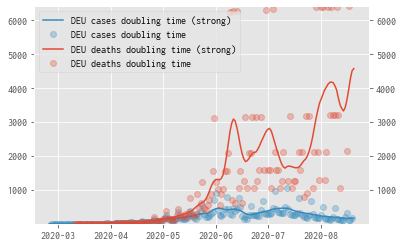

In [40]:
plots.plot_doubling_time(region)
# N.B. still trying to work out why parts of that line are missing

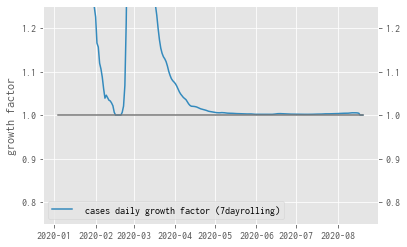

In [41]:
plots.plot_growth_factor(data.confirmed)

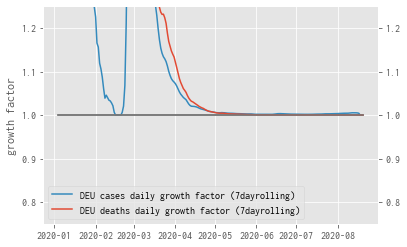

In [42]:
plots.plot_growth_factor(region)

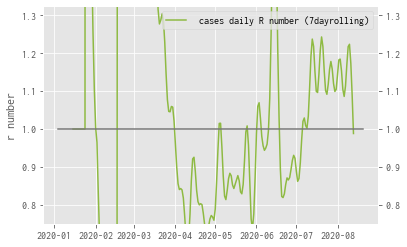

In [43]:
plots.plot_r_number(data.confirmed)

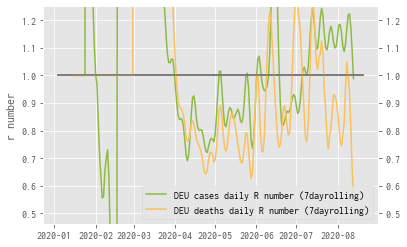

In [44]:
plots.plot_r_number(region)

# TODO:

Many things, including:
- comparison plots
- the summay plot
- normalisation by population
- tests
- tutorials
- building docs